In [3]:
import requests

In [4]:
sess = requests.Session()

In [15]:
x = sess.get("https://map.naver.com/v5/api/transit/bus/routes/1116?lang=ko&caller=naver_map&output=json")

In [16]:
x.json().keys()

dict_keys(['id', 'name', 'longName', 'type', 'city', 'company', 'startPoint', 'endPoint', 'realtime', 'schedule', 'timetables', 'turningPoint', 'mainStops', 'busStops', 'points'])

In [16]:
x.json()['schedule']

{'startPoint': {'firstTime': '04:00', 'lastTime': '22:30'},
 'endPoint': None,
 'intervals': [{'name': '평일', 'min': 9, 'max': 9, 'count': None},
  {'name': '토요일', 'min': 8, 'max': 8, 'count': None},
  {'name': '일요일', 'min': 10, 'max': 10, 'count': None}]}

In [58]:
y = sess.get("https://map.naver.com/v5/api/search?caller=pcweb&query=551&type=bus-route")
y.json()['result']['bus']['busRoute']['list']

[{'index': 0,
  'rank': 1,
  'id': '21073',
  'name': '551',
  'aliasName': '',
  'displayName': '551',
  'cityCode': '2000',
  'cityName': '인천',
  'type': '12',
  'typeName': '지선',
  'typeIconName': '지선',
  'startPoint': '청천농장',
  'endPoint': '부평역',
  'turningPointIdx': '20',
  'firstTime': '04:59',
  'lastTime': '23:35',
  'intervalTime': '13',
  'intervalCount': '',
  'liveUpdate': True,
  'mainStation': '청천농장(종점)-인향아파트-청천치안센터-청천중학교-현대5차-부평여자고등학교-부평시장입구-농협로타리-부평시장(한국자산관리공사)-KT부평지사-부평우체국-산곡동천주교회-성산교회-인향아파트-청천농장(종점)',
  'event': None},
 {'index': 1,
  'rank': 2,
  'id': '1460165',
  'name': '551',
  'aliasName': '삽교역.덕산.스파캐슬.수덕사.광천리',
  'displayName': '551(삽교역.덕산.스파캐슬.수덕사.광천리)',
  'cityCode': '3130',
  'cityName': '예산군',
  'type': '20',
  'typeName': '농어촌',
  'typeIconName': '농어촌',
  'startPoint': '예산종합버스터미널',
  'endPoint': '복당리',
  'turningPointIdx': '-1',
  'firstTime': '15:00',
  'lastTime': '15:00',
  'intervalTime': '',
  'intervalCount': '1',
  'liveUpdate': False,
  'mainStatio

In [5]:
def printBusInfo(busDict) : 
    print(" / ".join([str(busDict['index']), busDict['id'], busDict['name'], busDict['cityName'], busDict['startPoint'], busDict['endPoint'], busDict['intervalTime']]))
    return busDict['id']


def showBusList(jsonRes):
    buses = jsonRes['result']['bus']['busRoute']['list']
    idList = []
    
    print(" / ".join(['index', 'id', '노선번호', '관할시군', '기점', '종점', '배차간격']))
    
    for bus in buses:
        t = printBusInfo(bus)
        idList.append(t)
    
    return idList
    
    
def getBusInfo(query, sess, page = 1):
    temp = sess.get("https://map.naver.com/v5/api/search?caller=pcweb&query="
                    + query + "&type=bus-route&page=" 
                    + str(page) + "&displayCount=20&lang=ko")
    return temp.json()


def runSearch(sess, busIdList):
    outer = 1
    while outer : 
        query = input("검색할 노선 번호를 입력하세요: ")
        if query == "exit" : 
            outer = 0
        elif not query : 
            pass
        else : 
            middle = 1
            page = 1
            while middle : 
                inner = 1
                res = getBusInfo(query, sess, page)
                total = res['result']['bus']['busRoute']['totalCount']
                ids = showBusList(res)
                print("총 %d건의 검색 결과 중 %d번째까지의 검색 결과입니다." % (total, page*20))
                while inner : 
                    choice = input("원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: ")
                    if choice == 'x' : 
                        inner = 0
                        middle = 0
                    elif choice == 'n':
                        if page*20 < total : 
                            page += 1
                            inner = 0
                            print("")
                        else : 
                            print('마지막 페이지입니다.')
                        
                    elif choice == 'p' : 
                        if page == 1 : 
                            print('첫번째 페이지입니다.')
                        else : 
                            page -= 1
                            inner = 0
                            print("")
                        
                    elif choice == 'exit' : 
                        inner = 0
                        middle = 0
                        outer = 0
                    else : 
                        try : 
                            i = int(choice)
                            check = input("원하는 노선의 id가 %s가(이) 맞습니까? (Y/N): " % ids[i])
                        except IndexError : 
                            print("잘못된 인덱스입니다.")
                        except ValueError : 
                            print('숫자를 입력하세요.')
                        else : 
                            if check == 'y' or check == 'Y' : 
                                busIdList.append(ids[int(choice)])
                                inner = 0
                                middle = 0
                                print('')
                            elif check == 'exit' : 
                                inner = 0
                                middle = 0
                                outer = 0
                            else : 
                                pass

In [57]:
s = input()
print(type(s))

5
<class 'str'>


In [3]:
ids = ['10012', '9525', '10010', '9528', '9513', '9569', '10013', '9660']

In [70]:
runSearch(sess, ids)

검색할 노선 번호를 입력하세요: 720-2
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 10012 / 720-2 / 광주 / 경기고속차고지 / 백현마을8단지 / 15
원하는 노선의 id가 있는 index를 입력하세요. 재검색하려면 x를 입력하세요: 0
원하는 노선의 id가 10012가(이) 맞습니까? (Y/N): y
검색할 노선 번호를 입력하세요: 62-1
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 9525 / 62-1 / 수원 / 동탄차고지 / LG빌리지3차아파트 / 8
1 / 2800513 / 62-1 / 아산 / 음봉농협 / 고속버스터미널 / 
2 / 1420333 / 62-1 / 당진군 / 당진터미널 / 적서리 / 
3 / 1420330 / 62-1 / 당진군 / 당진터미널 / 대호지 / 
4 / 1420318 / 62-1 / 당진군 / 반곡 / 당진터미널 / 
5 / 1550255 / 62-1 / 문경 / 동로 / 석항 / 
6 / 1840207 / 62-1 / 담양군 / 담양터미널 / 담양터미널 / 
7 / 1840208 / 62-1 / 담양군 / 담양터미널 / 담양터미널 / 
원하는 노선의 id가 있는 index를 입력하세요. 재검색하려면 x를 입력하세요: 0
원하는 노선의 id가 9525가(이) 맞습니까? (Y/N): y
검색할 노선 번호를 입력하세요: 720-1
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 10010 / 720-1 / 광주 / 지역난방공사.신나무실쌍용아파트 / 서현역.AK플라자 / 15
1 / 2510270 / 720-1 / 청주 / 비하종점 / 비하종점 / 272
2 / 2300 / 720-1A / 성남 / 오리역 / 남한산성입구 / 15
3 / 51020 / 광산720-1 / 광주 / 봉정 / 호남대 / 200
원하는 노선의 id가 있는 index를 입력하세요. 재검색하려면 x를 입력하세요: 0
원하는 노선의 i

In [72]:
ids

['10012', '9525', '10010', '9528', '9513']

In [77]:
runSearch(sess, ids)

검색할 노선 번호를 입력하세요: 13-1
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 7028 / 013-1 / 부천 / 수궁동양지연립 / 부천시청 / 15
1 / 9569 / 13-1 / 수원 / 수원남부버스공영차고지 / 금곡동강남아파트 / 9
2 / 17046 / 13-1 / 양주 / 가래비주유소 / 백석농협 / 
3 / 16207 / 13-1 / 화성 / 우림주공아파트 / 구문천1리진입로 / 20
4 / 1540487 / 13-1 / 김천 / 추풍령종점 / 무실 / 
5 / 1540488 / 13-1 / 김천 / 김천시외버스터미널기점 / 무실 / 
6 / 1540486 / 13-1 / 김천 / 무실 / 김천시외버스터미널 / 
7 / 1840168 / 13-1 / 담양군 / 담양터미널 / 담양터미널 / 
8 / 1840169 / 13-1 / 담양군 / 담양터미널 / 담양터미널 / 
9 / 1770028 / 13-1 / 목포 / 석현동 / 신안군교육청 / 
원하는 노선의 id가 있는 index를 입력하세요. 재검색하려면 x를 입력하세요: ㅊ
숫자를 입력하세요.
원하는 노선의 id가 있는 index를 입력하세요. 재검색하려면 x를 입력하세요: 1
원하는 노선의 id가 9569가(이) 맞습니까? (Y/N): y


검색할 노선 번호를 입력하세요: 700-2
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 10013 / 700-2 / 광주 / 오리역 / 수원대학교 / 20
원하는 노선의 id가 있는 index를 입력하세요. 재검색하려면 x를 입력하세요: 0
원하는 노선의 id가 10013가(이) 맞습니까? (Y/N): y


검색할 노선 번호를 입력하세요: 900
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 9660 / 900 / 수원 / 경희대학교 / 보라매공원 / 12
1 / 12015 / 900 / 파주 / 통일동산전망대 / 현대백화점 / 18
2 /

IndexError: list index out of range

In [ ]:
runSearch(sess, ids)

In [90]:
y = sess.get("https://map.naver.com/v5/api/search?caller=pcweb&query=3&type=bus-route&page=1&displayCount=20&lang=ko")
y.json()['result']['bus']['busRoute']['totalCount']

307

In [93]:
ids

['10012', '9525', '10010', '9528', '9513', '9569', '10013', '9660']

In [104]:
runSearch(sess, ids)

검색할 노선 번호를 입력하세요: 3
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 1595 / 관악03 / 서울 / 국사봉 / 신림역 / 7
1 / 1649 / 동작03 / 서울 / 신대방삼거리 / 노들역 / 5
2 / 1528 / 금천03 / 서울 / 가산디지털단지역 / 구로디지털단지역 / 8
3 / 1659 / 영등포03 / 서울 / 현대아파트 / 영등포시장 / 7
4 / 6003 / 3 / 안양 / 평촌차고지 / 철산역 / 8
5 / 1685 / 용산03 / 서울 / 하얏트호텔 / 하얏트호텔 / 15
6 / 2621 / TOUR03 / 서울 / 강남역 / 강남역 / 65
7 / 7515 / 3 / 과천 / 과천시청 / 과천시청 / 50
8 / 1605 / 서초03 / 서울 / 교대역 / 신사역 / 6
9 / 1715 / 03 / 서울 / 남산서울타워 / 남산서울타워 / 22
10 / 1507 / 마포03 / 서울 / 아현역 / 아현역 / 10
11 / 1644 / 구로03 / 서울 / 개봉한진아파트 / 개봉역 / 6
12 / 1633 / 양천03 / 서울 / 신정이펜하우스1단지 / 목동역 / 7
13 / 1554 / 서대문03 / 서울 / 홍은2동주민센터 / 신촌역 / 5
14 / 18715 / 3 / 군포 / 당정역 / 금정역 / 14
15 / 7056 / 3 / 부천 / 소사공영차고지 / 김포공항국내선(9번홈) / 14
16 / 11541 / 3 / 시흥 / 산호아파트 / 시흥대야역.영남아파트 / 10
17 / 8505 / 3 / 구리 / 다산차고지 / 현대코아 / 50
18 / 6060 / 3-1 / 안양 / 임곡주공아파트 / 교보생명.시외버스터미널 / 40
19 / 6519 / 3 / 안산 / 푸르지오6차후문 / 수암파출소건너편 / 60
총 307건의 검색 결과 중 20번째까지의 검색 결과입니다.
원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: p
첫번째 페이지

원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: n

index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 1710081 / 7 / 청도군 / 청도 / 숯골 / 
1 / 1710083 / 7 / 청도군 / 청도 / 와인터널 / 
2 / 1710074 / 7 / 청도군 / 청도 / 숯골 / 
3 / 1710072 / 7 / 청도군 / 청도 / 덕암 / 
4 / 2010006 / 7 / 밀양 / 밀양역(종점) / 춘기 / 
5 / 5133 / 7-1 / 성남 / 미금역 / 분당서울대병원 / 8
6 / 1750226 / 7 / 광양 / 매천역사공원 / 대실 / 
7 / 1750228 / 7 / 광양 / 매화아파트 / 대실 / 
8 / 1750227 / 7 / 광양 / 사곡 / 매화아파트 / 
9 / 2050004 / 7 / 창원 / 창원역 / 창원역 / 15
10 / 1770016 / 7 / 목포 / 삼학도 / 삼학도 / 15
11 / 2000160 / 7 / 김해 / 외동차고지 / 어방종점 / 13
12 / 1790288 / 7 / 여수 / 미평초등학교 / 신덕경로당 / 
13 / 1790284 / 7 / 여수 / 신덕경로당 / 한국전력 / 
14 / 1790286 / 7 / 여수 / 미평초등학교 / 오천동마을입구 / 
15 / 1790285 / 7 / 여수 / 오천동마을입구 / 한국전력 / 
16 / 1790289 / 7 / 여수 / 한국전력 / 오천동마을입구 / 
17 / 1790283 / 7 / 여수 / 오천동마을입구 / 전남대여수캠퍼스 / 
18 / 1790287 / 7 / 여수 / 오천동마을입구 / 미평초등학교 / 
19 / 71102 / 7 / 부산 / 청학동 / 수산가공선진화단지 / 16
총 183건의 검색 결과 중 80번째까지의 검색 결과입니다.
원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: n

index / id 

원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: p

index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 18013 / 7-3 / 안성 / 안성종합버스터미널 / 신용정 / 
1 / 2800890 / 07(시외버스터미널경유) / 춘천 / 후평동종점 / 구곡폭포종점 / 
2 / 2800891 / 07(호반병원경유) / 춘천 / 후평동종점 / 후평동종점 / 
3 / 2800892 / 07-S / 춘천 / 후평동종점 / 춘천여고앞 / 
4 / 2340434 / 7(공영) / 원주 / 문막읍행정복지센터 / 문막읍행정복지센터 / 
5 / 2340435 / 7(공영) / 원주 / 문막읍행정복지센터 / 문막읍행정복지센터 / 
6 / 2340436 / 7(공영) / 원주 / 문막읍행정복지센터 / 문막읍행정복지센터 / 
7 / 2340287 / 통학7 / 원주 / 건영아파트 / 육민관고 / 
8 / 2510312 / 007 / 청주 / 청석고등학교 / 고속.시외터미널 / 
9 / 2530231 / 7-1 / 제천 / 대원대 / 한천 / 
10 / 2330320 / 7(설악산소공원) / 속초 / 장사동차고지 / 장사동차고지 / 
11 / 2330451 / 7(설악산소공원) / 고성군 / 장사동차고지 / 장사동차고지 / 
12 / 2330317 / 7-1(설악산소공원) / 속초 / 장사동차고지 / 장사동차고지 / 
13 / 2330452 / 7-1(설악산소공원) / 고성군 / 장사동차고지 / 장사동차고지 / 
14 / 2330319 / 7-3(장사동) / 속초 / 설악산소공원 / 장사동차고지 / 
15 / 2330454 / 7-3(장사동) / 고성군 / 설악산소공원 / 장사동차고지 / 
16 / 2330318 / 7-2(장재터) / 속초 / 장사동차고지 / 장사동차고지 / 
17 / 2330453 / 7-2(장재터) / 고성군 / 장사동차고지 / 장사동차고지 / 
18 / 2190052 / 7-2 /

# 12/9

In [5]:
ids

['10012', '9525', '10010', '9528', '9513', '9569', '10013', '9660']

In [6]:
runSearch(sess, ids)

검색할 노선 번호를 입력하세요: 3
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 1595 / 관악03 / 서울 / 국사봉 / 신림역 / 7
1 / 1649 / 동작03 / 서울 / 신대방삼거리 / 노들역 / 5
2 / 1528 / 금천03 / 서울 / 가산디지털단지역 / 구로디지털단지역 / 8
3 / 1659 / 영등포03 / 서울 / 현대아파트 / 영등포시장 / 7
4 / 6003 / 3 / 안양 / 평촌차고지 / 철산역 / 8
5 / 1685 / 용산03 / 서울 / 하얏트호텔 / 하얏트호텔 / 15
6 / 2621 / TOUR03 / 서울 / 강남역 / 강남역 / 65
7 / 7515 / 3 / 과천 / 과천시청 / 과천시청 / 50
8 / 1605 / 서초03 / 서울 / 교대역 / 신사역 / 6
9 / 1715 / 03 / 서울 / 남산서울타워 / 남산서울타워 / 22
10 / 1507 / 마포03 / 서울 / 아현역 / 아현역 / 10
11 / 1644 / 구로03 / 서울 / 개봉한진아파트 / 개봉역 / 6
12 / 1633 / 양천03 / 서울 / 신정이펜하우스1단지 / 목동역 / 7
13 / 1554 / 서대문03 / 서울 / 홍은2동주민센터 / 신촌역 / 5
14 / 18715 / 3 / 군포 / 당정역 / 금정역 / 14
15 / 7056 / 3 / 부천 / 소사공영차고지 / 김포공항국내선(9번홈) / 14
16 / 11541 / 3 / 시흥 / 산호아파트 / 시흥대야역.영남아파트 / 10
17 / 8505 / 3 / 구리 / 다산차고지 / 현대코아 / 50
18 / 6060 / 3-1 / 안양 / 임곡주공아파트 / 교보생명.시외버스터미널 / 40
19 / 6519 / 3 / 안산 / 푸르지오6차후문 / 수암파출소건너편 / 60
총 307건의 검색 결과 중 20번째까지의 검색 결과입니다.
원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: n

index 

원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: n

index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 1580005 / 3(청구A) / 영주 / 영주여객 / 한국폴리텍대학 / 15
1 / 2350114 / 통학3 / 강릉 / 우미린아파트 / 강릉고정문 / 
2 / 2800978 / 순환3 / 김천 / 김천시외버스터미널 / 김천시외버스터미널 / 
3 / 2190003 / 3-2 / 전주 / 전주대학교 / 전주대학교 / 16
4 / 2190171 / 3-2(분선) / 전주 / 동부시장 / 전주대학교 / 
5 / 2190002 / 3-1 / 전주 / 전주대학교 / 전주대학교 / 16
6 / 2190372 / 3-1(분선) / 전주 / 전주대학교 / 동부시장 / 14
7 / 2190120 / 3-1(분선) / 전주 / 전북대학교(농협앞) / 전주대학교 / 
8 / 2190374 / 3-2(분선) / 전주 / 전주대학교 / 전북대학교.소나무한의원앞 / 14
9 / 1570427 / 3-1 / 안동 / 터미널 / 교보생명 / 
10 / 1570122 / 3-1 / 안동 / 교보생명건너 / 터미널 / 
11 / 1570449 / 3-1 / 안동 / 교보생명건너 / 터미널 / 
12 / 2190119 / 3-1(분선) / 전주 / 모래내 / 전주대학교 / 
13 / 1570447 / 3-1 / 안동 / 교보생명건너 / 교보생명 / 
14 / 1570107 / 3-1 / 안동 / 관광단지 / 교보생명 / 
15 / 1570464 / 3-1 / 안동 / 관광단지 / 교보생명건너 / 
16 / 1570106 / 3-1 / 안동 / 관광단지 / 교보생명건너 / 
17 / 1570432 / 3-1 / 안동 / 교보생명 / 관광단지 / 
18 / 1570445 / 3-1 / 안동 / 교보생명 / 관광단지 / 
19 / 1570439 / 3-1 / 안동 / 교보생명 / 관광단지 / 
총 307건의 검색

원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: 4
원하는 노선의 id가 9574가(이) 맞습니까? (Y/N): y

검색할 노선 번호를 입력하세요: 8
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 1610 / 관악08 / 서울 / 난곡공영차고지 / 신림역 / 7
1 / 1664 / 동작08 / 서울 / 약수아파트 / 대방역 / 7
2 / 1548 / 금천08 / 서울 / 독산고등학교 / 금천구청역 / 9
3 / 528 / 영등포08 / 서울 / 신도림역 / 영등포푸르지오아파트 / 10
4 / 7504 / 8 / 과천 / 과천시청 / 과천시청 / 60
5 / 7505 / 8-1 / 과천 / 과천시청 / 과천시청 / 60
6 / 6068 / 8 / 안양 / 현대.대림아파트 / 동편마을2단지 / 18
7 / 6023 / 8 / 안양 / 안양천생태이야기관 / 민들레베스파트.우성고 / 6
8 / 1669 / 구로08 / 서울 / 개봉역 / 오류역 / 12
9 / 1518 / 마포08 / 서울 / 서부면허시험장 / 신촌전철역 / 5
10 / 7045 / 8 / 부천 / 대장공영차고지 / 고강동우체국 / 20
11 / 1457 / 강남08 / 서울 / 신사사거리 / 삼성역 / 15
12 / 1614 / 서초08 / 서울 / 서초추모공원 / 양재역 / 13
13 / 6005 / 8-2 / 안양 / 석수동버스공영차고지 / 우성고등학교 / 17
14 / 6007 / 8-1 / 안양 / 차고지입구 / 포일자이아파트사거리 / 6
15 / 1526 / 성동08 / 서울 / 금호역 / 시설관리공단 / 8
16 / 21007 / 8 / 인천 / 인천대학교공과대학 / 송내역 / 8
17 / 5124 / 8 / 성남 / 목련마을SK아파트 / 단대오거리 / 60
18 / 1696 / 종로08 / 서울 / 명륜3가 / 종로5가 / 5
19 / 661 / 8 / 구리 / 개나리아파트 / 돌섬마을 / 15


원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: n

index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 1910037 / 5 / 장성군 / 장성터미널 / 장성터미널 / 
1 / 1566 / 노원05 / 서울 / 온곡초등학교 / 창동역 / 9
2 / 1710119 / 5 / 청도군 / 동곡 / 청도 / 
3 / 1710122 / 5 / 청도군 / 청도 / 상동 / 
4 / 1710130 / 5 / 청도군 / 청도 / 상동 / 
5 / 1710133 / 5 / 청도군 / 청도 / 상동 / 
6 / 1710099 / 5 / 청도군 / 내동 / 청도 / 
7 / 1710104 / 5 / 청도군 / 동곡 / 청도 / 
8 / 1710116 / 5 / 청도군 / 동곡 / 청도 / 
9 / 1710135 / 5 / 청도군 / 청도 / 상동 / 
10 / 1710065 / 5 / 청도군 / 청도 / 유천 / 
11 / 1710064 / 5 / 청도군 / 청도 / 동곡 / 
12 / 1710060 / 5 / 청도군 / 청도 / 동곡 / 
13 / 1710070 / 5 / 청도군 / 청도 / 동곡 / 
14 / 1710071 / 5 / 청도군 / 청도 / 유호 / 
15 / 1710117 / 5 / 청도군 / 동곡 / 청도 / 
16 / 2010004 / 5 / 밀양 / 밀양역(종점) / 밀양역(종점) / 18
17 / 1790268 / 5 / 여수 / Lee가구갤러리건너편 / 신동아아파트 / 
18 / 1790267 / 5 / 여수 / 신동아아파트 / Lee가구갤러리 / 
19 / 11137 / 5-1 / 용인 / 동천역 / 수지구청역 / 20
총 234건의 검색 결과 중 100번째까지의 검색 결과입니다.
원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: n

index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 2

원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: n

index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 1694 / 종로05 / 서울 / 무악동 / 교남동 / 6
1 / 5109 / 5 / 성남 / 기업성장센터 / 종점 / 30
2 / 1520 / 성동05 / 서울 / 금호산 / 약수역 / 10
3 / 6056 / 5-3 / 안양 / 명학역 / 무궁화코오롱아파트 / 20
4 / 18925 / 05 / 의왕 / 골드클래스아파트 / 인덕원역4호선 / 40
5 / 18918 / 05-1 / 의왕 / 시티병원 / 인덕원역 / 50
6 / 1508 / 강남05 / 서울 / 구룡마을 / 석촌역 / 7
7 / 9576 / 5 / 수원 / 이목동차고지.이목동입구 / 경희대학교 / 12
8 / 6562 / 5 / 안산 / 경원여객 / 안산역 / 90
9 / 8522 / 5 / 구리 / 아름마을.LG성원아파트뒤 / 돌섬마을 / 15
10 / 11275 / 5 / 용인 / 상현동금호5단지 / 미금역 / 8
11 / 9015 / 5 / 의정부 / 홍죽리차고지 / 도봉소방서 / 13
12 / 1488 / 강서05 / 서울 / 강서농수산물도매시장 / 발산역.NC백화점 / 6
13 / 8027 / 5 / 하남 / 하남BRT환승센터 / 미사강변리버뷰자이.베라체 / 14
14 / 1690 / 은평05 / 서울 / 힐스테이트302동앞 / 힐스테이트302동앞 / 8
15 / 967 / 광진05 / 서울 / 신자초교 / 강변역 / 7
16 / 18504 / 5 / 남양주 / 휴먼시아아파트 / 사릉역 / 30
17 / 593 / 강서05-1 / 서울 / 다솔마을 / 마곡나루1번출구 / 25
18 / 514 / 동대문05 / 서울 / 답십리역 / 청량리역 / 6
19 / 11214 / 5 / 용인 / 용인터미널 / 용인시청후문 / 30
총 234건의 검색 결과 중 40번째까지의 검색 결과입니다.
원하는 노선의 id가

원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: 0
원하는 노선의 id가 9516가(이) 맞습니까? (Y/N): y

검색할 노선 번호를 입력하세요: 720-3
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 10106 / 720-3 / 화성 / 단국대차고지 / 서동탄역파크자이2차 / 60
총 1건의 검색 결과 중 20번째까지의 검색 결과입니다.
원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: 0
원하는 노선의 id가 10106가(이) 맞습니까? (Y/N): y

검색할 노선 번호를 입력하세요: 34-1
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 16011 / 34-1 / 수원 / 수원시동부차고지 / 왕림휴게소 / 20
1 / 11258 / 34-1 / 용인 / 효성빌라 / 기흥구청 / 30
2 / 10218 / 34-1 / 광주 / 보건소.공설운동장 / 광주공원앞 / 180
3 / 1420027 / 34-1 / 당진군 / 구터미널 / 명산리(외나무) / 
4 / 1420399 / 34-1 / 당진군 / 명산리(외나무) / 보건소 / 
5 / 1420400 / 34-1 / 당진군 / 명산리(외나무) / 당진터미널 / 
6 / 2550125 / 34-1 / 옥천군 / 석탄 / 옥천 / 
7 / 2550126 / 34-1 / 옥천군 / 옥천 / 석탄 / 
8 / 2190487 / 34-1 / 전주 / 봉동주공아파트 / 해전 / 240
9 / 2190488 / 34-1 / 전주 / 해전 / 봉동주공아파트 / 240
10 / 1730044 / 34-1 / 칠곡군 / 왜관북부 / 송산3리 / 
11 / 1730045 / 34-1 / 칠곡군 / 송산3리옻밭입구 / 왜관북부 / 
12 / 1840181 / 34-1 / 담양군 / 담양터미널 / 담양터미널 / 
총 13건의 검색 결과 중 20번째까지의

KeyError: 'result'

In [8]:
runSearch(sess, ids)

검색할 노선 번호를 입력하세요: 116-1
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 10059 / 116-1 / 광주 / 정자역 / 원영화남아파트 / 25
1 / 1540431 / 116-1 / 김천 / 개자 / 중앙중학교 / 
총 2건의 검색 결과 중 20번째까지의 검색 결과입니다.
원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: 0
원하는 노선의 id가 10059가(이) 맞습니까? (Y/N): y

검색할 노선 번호를 입력하세요: 25
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 7002 / 25 / 부천 / 소사공영차고지 / 한아름마을.반달마을 / 17
1 / 5001 / 25 / 성남 / 목련마을SK아파트 / 야탑고교.예비군훈련장 / 20
2 / 9547 / 25 / 수원 / 이목동차고지.이목동입구 / 덕신상가 / 20
3 / 9617 / 25 / 수원 / 당수동.쌍용아파트 / 성대역 / 20
4 / 11210 / 25 / 용인 / 단국대학교 / 미금역 / 10
5 / 11507 / 25 / 시흥 / 오이도해양단지 / 정왕역환승센터 / 60
6 / 9022 / 25 / 의정부 / 경기도교육청북부청사 / 적성전통시장 / 25
7 / 13065 / 25 / 김포 / 하성종점 / 하성종점 / 30
8 / 13096 / 25 / 김포 / 하성종점 / 하성종점 / 60
9 / 13082 / 25 / 김포 / 하성종점 / 하성종점 / 60
10 / 16172 / 25 / 화성 / 조암터미널 / 사곡6리 / 
11 / 10144 / 25 / 광주 / 장호원초등학교 / 이천터미널 / 50
12 / 1420305 / 25 / 당진군 / 합덕 / 보건소 / 
13 / 1420307 / 25 / 당진군 / 합덕 / 당진터미널 / 
14 / 1420302 / 25 / 당진군 / 구터미널 / 합덕 / 
15 / 9651 / 25-2 / 수원 / 이

원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: 7
원하는 노선의 id가 9662가(이) 맞습니까? (Y/N): y

검색할 노선 번호를 입력하세요: 701
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 1241 / 701 / 서울 / 진관공영차고지 / 명동입구 / 8
1 / 21311 / 701 / 인천 / 청라국제도시역 / 가정(루원시티)역 / 15
2 / 16019 / 701 / 화성 / 화성운수차고지 / 병점역사거리 / 25
3 / 17085 / 701 / 양주 / 경동대학교 / 양주역 / 110
4 / 1400137 / 701 / 천안 / 안서동(문암) / 전의읍내리(종점) / 
5 / 1400140 / 701 / 천안 / 전의읍내리(종점) / 안서동(문암) / 
6 / 1390233 / 701 / 아산 / 매곡1리 / 아산시평생학습관 / 
7 / 1390074 / 701 / 아산 / 아산시평생학습관 / 매곡1리 / 
8 / 1380481 / 701 / 서산 / 서산공용버스터미널 / 서산공용버스터미널 / 
9 / 1480525 / 701 / 태안군 / 태안터미널 / 신온 / 
10 / 1490206 / 701 / 홍성군 / 화계 / 광천 / 
11 / 1490116 / 701 / 홍성군 / 광천 / 화계 / 
12 / 1370322 / 701 / 보령 / 대천 / 오천 / 
13 / 1370075 / 701 / 보령 / 대천 / 광천 / 
14 / 961 / 701 / 청양군 / 청양 / 사천 / 
15 / 31204 / 701 / 대전 / 탑립동 / 대전고등학교 / 14
16 / 1430050 / 701 / 부여군 / 논산시내버스정류장.덕성여객 / 우체국.성요셉병원 / 70
17 / 1360268 / 701 / 논산 / 논산시내버스정류장.덕성여객 / 우체국.성요셉병원 / 72
18 / 1360269 / 701 / 논산 / 서독안경원 / 논산시내버스정류장.덕성여객 

In [10]:
len(ids)

41

In [11]:
runSearch(sess, ids)

검색할 노선 번호를 입력하세요: 111
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 21046 / 111 / 인천 / 강인여객 / 왕산차고지 / 15
1 / 5122 / 111 / 성남 / 정자역 / 분당서울대학교병원 / 20
2 / 5052 / 111 / 성남 / 정자역 / 분당서울대병원 / 30
3 / 9053 / 111 / 의정부 / 민락문화근린공원 / 하계미성아파트 / 15
4 / 15022 / 111 / 오산 / 오산교통차고지 / 화성중고등학교 / 25
5 / 10028 / 111 / 광주 / 여주대하차장 / 불교회관 / 30
6 / 2510002 / 111 / 청주 / 동부종점 / 한국교통대 / 30
7 / 1480014 / 111 / 태안군 / 태안터미널 / 갈음이 / 
8 / 1470099 / 111 / 청양군 / 청양 / 광시 / 
9 / 1964 / 111A / 인천 / 강인여객 / 청라국제도시역 / 15
10 / 1967 / 111C / 인천 / 부평역 / 인천공항 / 
11 / 1965 / 111B / 인천 / 계산역 / 인천국제공항 / 10
12 / 2540057 / 111 / 보은군 / 보은터미널 / 미원 / 
13 / 21116 / 111-2 / 인천 / 무지개아파트 / 진선미예식장 / 12
14 / 1560010 / 111 / 상주 / 점촌 / 상주 / 
15 / 2560056 / 111 / 영동군 / 영동 / 무주 / 
16 / 2230114 / 111 / 익산 / 북부시장 / 원대병원건너편 / 
17 / 2230113 / 111 / 익산 / 삼례터미널 / 원대병원건너편 / 12
18 / 2230112 / 111 / 익산 / 원대병원건너편 / 원대병원건너편 / 12
19 / 2230015 / 111 / 익산 / 원대병원건너편 / 삼례터미널 / 24
총 83건의 검색 결과 중 20번째까지의 검색 결과입니다.
원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 

원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: 7
원하는 노선의 id가 9503가(이) 맞습니까? (Y/N): y

검색할 노선 번호를 입력하세요: 13
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 1672 / 동작13 / 서울 / 봉천고개 / 대방역 / 15
1 / 1485 / 영등포13 / 서울 / 대방천사거리 / 신도림역 / 15
2 / 1634 / 서초13 / 서울 / 이수역 / 동덕여고 / 8
3 / 1512 / 구로13 / 서울 / 구로1동주민센터 / 구로1동주민센터 / 10
4 / 18902 / 13 / 의왕 / 숲속마을3.5단지 / 옥박골 / 60
5 / 1539 / 마포13 / 서울 / 창전시범(아) / 신촌전철역 / 25
6 / 571 / N13 / 서울 / 상계주공7단지 / 장지역 / 27
7 / 11539 / 13 / 시흥 / 포동차고지 / 은행초등학교 / 25
8 / 10083 / 13 / 광주 / 광주터미널 / 강변역.테크노마트앞(D) / 25
9 / 603 / 성동13 / 서울 / 옥수역7번출구 / 성수역3번출구 / 15
10 / 9568 / 13 / 수원 / 상광교동종점 / 칠보중학교 / 7
11 / 7028 / 013-1 / 부천 / 수궁동양지연립 / 부천시청 / 15
12 / 7029 / 013-2 / 부천 / 수궁동양지연립 / 소명여고사거리 / 15
13 / 1587 / 서대문13 / 서울 / 국민주택 / 홍제원현대아파트 / 25
14 / 7039 / 013 / 부천 / 역곡역 / 한국아파트 / 13
15 / 7030 / 013-3 / 부천 / 역곡역북부 / 장미공원앞 / 7
16 / 21012 / 13 / 인천 / 신흥교통 / 검암역(원당방면) / 15
17 / 808 / 13 / 안산 / 원시역 / 송린초교앞 / 40
18 / 1762 / 종로13 / 서울 / 평창동 / 평창운수 / 13
19 / 16196 / 13 / 화성 / 병점

원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: n

index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 2210334 / 15 / 김제 / 신광리 / 김제역 / 
1 / 2210324 / 15 / 김제 / 김제역 / 구복리 / 
2 / 2210308 / 15 / 김제 / 구복리 / 죽산 / 
3 / 2210310 / 15 / 김제 / 구복리 / 김제역 / 
4 / 2210316 / 15 / 김제 / 김제역 / 신광리 / 
5 / 2210327 / 15 / 김제 / 김제역 / 신광리 / 
6 / 2210329 / 15 / 김제 / 신광리 / 김제역 / 
7 / 5525 / 015 / 고양 / 성사중학교 / 신원당600단지 / 15
8 / 1910053 / 15 / 장성군 / 장성터미널 / 장성터미널 / 
9 / 1750142 / 15 / 광양 / 매화아파트 / 하천리 / 
10 / 1750144 / 15 / 광양 / 매화아파트 / 하천리 / 
11 / 1750143 / 15 / 광양 / 하천리 / 매화아파트 / 
12 / 1750145 / 15 / 광양 / 하천리 / 매화아파트 / 
13 / 1780093 / 15 / 순천 / 고산 / 해룡대안 / 
14 / 1520365 / 15 / 경주 / 시외버스터미널.고속버스터미널 / 고속버스터미널 / 300
15 / 1520366 / 15 / 경주 / 보문마을 / 고속버스터미널 / 300
16 / 1780092 / 15 / 순천 / 해룡대안 / 축내 / 
17 / 2050017 / 15 / 창원 / 창원역 / 명촌마을 / 205
18 / 2000118 / 15 / 김해 / 진영 / 진례파출소 / 
19 / 60248 / 15 / 울산 / 함월구민운동장 / 박병원 / 
총 141건의 검색 결과 중 80번째까지의 검색 결과입니다.
원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: n

ind

In [12]:
len(ids)

50

In [13]:
from collections import Counter

In [14]:
Counter(ids).most_common()

[('10012', 1),
 ('9525', 1),
 ('10010', 1),
 ('9528', 1),
 ('9513', 1),
 ('9569', 1),
 ('10013', 1),
 ('9660', 1),
 ('9573', 1),
 ('9536', 1),
 ('9571', 1),
 ('9574', 1),
 ('15015', 1),
 ('9535', 1),
 ('9515', 1),
 ('15074', 1),
 ('9576', 1),
 ('9692', 1),
 ('9622', 1),
 ('9548', 1),
 ('9600', 1),
 ('9652', 1),
 ('9520', 1),
 ('9516', 1),
 ('10106', 1),
 ('16011', 1),
 ('16008', 1),
 ('10059', 1),
 ('9547', 1),
 ('15007', 1),
 ('16051', 1),
 ('9542', 1),
 ('9579', 1),
 ('9654', 1),
 ('10076', 1),
 ('9662', 1),
 ('16019', 1),
 ('10049', 1),
 ('16054', 1),
 ('9500', 1),
 ('9502', 1),
 ('15022', 1),
 ('10458', 1),
 ('9503', 1),
 ('9568', 1),
 ('16095', 1),
 ('9599', 1),
 ('9572', 1),
 ('15026', 1),
 ('9679', 1)]

In [ ]:
x = sess.get("https://map.naver.com/v5/api/transit/bus/routes/1116?lang=ko&caller=naver_map&output=json")
x.json().keys()

In [17]:
from datetime import datetime

In [18]:
x.json().keys()

dict_keys(['id', 'name', 'longName', 'type', 'city', 'company', 'startPoint', 'endPoint', 'realtime', 'schedule', 'timetables', 'turningPoint', 'mainStops', 'busStops', 'points'])

In [26]:
last = datetime.strptime(x.json()['schedule']['startPoint']['lastTime'], "%H:%M")
start = datetime.strptime(x.json()['schedule']['startPoint']['firstTime'], "%H:%M")

In [30]:
diff = last - start

In [36]:
diff.seconds/(8*60)

138.75

In [39]:
last-start

datetime.timedelta(seconds=66600)

In [42]:
x.json()['schedule']['intervals'][0]

{'name': '평일', 'min': 9, 'max': 9, 'count': None}

In [55]:
from shapely.geometry import Point, LineString, MultiPoint

In [80]:
gathered = []

In [54]:
for naverBusId in ids : 
    temp = sess.get("https://map.naver.com/v5/api/transit/bus/routes/" + naverBusId + "?lang=ko&caller=naver_map&output=json")
    json = temp.json()
    print("\t".join([json['name'], str(json['schedule']['startPoint']), str(json['schedule']['intervals'][0])]))

720-2	{'firstTime': '05:00', 'lastTime': '22:55'}	{'name': '평일', 'min': 5, 'max': 15, 'count': None}
62-1	{'firstTime': '05:00', 'lastTime': '22:40'}	{'name': '평일', 'min': 6, 'max': 8, 'count': None}
720-1	{'firstTime': '04:50', 'lastTime': '22:30'}	{'name': '평일', 'min': 10, 'max': 15, 'count': None}
301	{'firstTime': '04:30', 'lastTime': '22:40'}	{'name': '평일', 'min': 5, 'max': 7, 'count': None}
92-1	{'firstTime': '04:45', 'lastTime': '22:30'}	{'name': '평일', 'min': 7, 'max': 9, 'count': None}
13-1	{'firstTime': '05:00', 'lastTime': '22:25'}	{'name': '평일', 'min': 7, 'max': 9, 'count': None}
700-2	{'firstTime': '05:00', 'lastTime': '23:00'}	{'name': '매일', 'min': 10, 'max': 20, 'count': None}
900	{'firstTime': '04:10', 'lastTime': '23:00'}	{'name': '평일', 'min': 8, 'max': 12, 'count': None}
3	{'firstTime': '05:00', 'lastTime': '22:30'}	{'name': '평일', 'min': 9, 'max': 10, 'count': None}
98	{'firstTime': '04:50', 'lastTime': '22:10'}	{'name': '평일', 'min': 8, 'max': 12, 'count': None}
7-1	{'

In [81]:
for naverBusId in ids : 
    eachRes = []
    temp = sess.get("https://map.naver.com/v5/api/transit/bus/routes/" + naverBusId + "?lang=ko&caller=naver_map&output=json")
    json = temp.json()
    eachRes.append(json['name'])
    eachRes.append(json['city']['name'])
    eachRes.append(json['company']['name'])
    eachRes.append(json['schedule']['startPoint']['firstTime'])
    eachRes.append(json['schedule']['startPoint']['lastTime'])
    eachRes.append(json['schedule']['intervals'][0]['min'])
    eachRes.append(json['schedule']['intervals'][0]['max'])
    eachRes.append(makeLine(json['points']))
    eachRes.append(makePoints(json['busStops']))
    gathered.append(eachRes)

In [82]:
gathered

[['720-2',
  '광주',
  '경기고속(수원대영업소)',
  '05:00',
  '22:55',
  5,
  15,
 ['62-1',
  '수원',
  '수원여객(동탄영업소)',
  '05:00',
  '22:40',
  6,
  8,
 ['720-1',
  '광주',
  '경기고속(기흥영업소)',
  '04:50',
  '22:30',
  10,
  15,
 ['301',
  '수원',
  '성우운수(하북영업소)',
  '04:30',
  '22:40',
  5,
  7,
 ['92-1',
  '수원',
  '수원여객(동탄영업소)',
  '04:45',
  '22:30',
  7,
  9,
 ['13-1',
  '수원',
  '수원여객(영통영업소)',
  '05:00',
  '22:25',
  7,
  9,
 ['700-2',
  '광주',
  '경기고속(분당영업소)',
  '05:00',
  '23:00',
  10,
  20,
 ['900',
  '수원',
  '성우운수(영통영업소)',
  '04:10',
  '23:00',
  8,
  12,
 ['3',
  '수원',
  '수원여객(영통영업소)',
  '05:00',
  '22:30',
  9,
  10,
 ['98',
  '수원',
  '수원여객(동탄영업소)',
  '04:50',
  '22:10',
  8,
  12,
 ['7-1',
  '수원',
  '수원여객(동탄영업소)',
  '05:00',
  '22:40',
  6,
  10,
 ['2-1',
  '수원',
  '수원여객(영통영업소)',
  '05:00',
  '22:30',
  8,
  11,
 ['8',
  '오산',
  '오산교통',
  '05:00',
  '22:30',
  8,
  22,
 ['13-5',
  '수원',
  '용남고속',
  '05:40',
  '23:00',
  8,
  13,
 ['300',
  '수원',
  '삼경운수(고색동영업소)',
  '04:30',
  '22:30',
  6,
  8,
 ['20

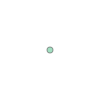

In [72]:
Point(x.json()['points'][0]['x'], x.json()['points'][0]['y'])

In [74]:
x.json()['busStops'][0]

{'id': 83580,
 'name': '난곡종점',
 'longName': '난곡종점',
 'displayName': '난곡종점',
 'displayCode': '21-809',
 'transport': {'id': 'bus', 'name': '시내버스'},
 'point': {'x': 126.9192899, 'y': 37.4639677},
 'city': {'id': 1000, 'name': '서울'},
 'address': '서울특별시 관악구 난향동',
 'roadAddress': None,
 'streetPanorama': {'id': 'j5pHb+5dZrh9cAic6sEVZg==',
  'pan': 86.50597,
  'tilt': 0.0,
  'fieldView': 120,
  'lat': 37.4639578,
  'lng': 126.9191883},
 'realtime': True,
 'subwayLaneTypes': [],
 'stop': True}

In [52]:
def makeLine(pointList) : 
    res = []
    for pointDict in pointList : 
        res.append(Point(pointDict['x'], pointDict['y']))
    return LineString(res)

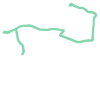

In [77]:
makeLine(x.json()['points'])

In [53]:
def makePoints(stopList):
    res = []
    for stopDict in stopList : 
        res.append(Point(stopDict['point']['x'], stopDict['point']['y']))
    return MultiPoint(res)

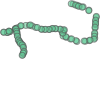

In [79]:
makePoints(x.json()['busStops'])

In [83]:
import geopandas as gpd

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [85]:
fiftyBuses = gpd.GeoDataFrame(gathered)

In [87]:
fiftyBuses.head()

,0,1,2,3,4,5,6,7,8
0,720-2,광주,경기고속(수원대영업소),05:00,22:55,5,15,"LINESTRING (126.9956373 37.1974708, 126.994192...","(POINT (126.9956373 37.1974708), POINT (126.99..."
1,62-1,수원,수원여객(동탄영업소),05:00,22:40,6,8,"LINESTRING (127.0786896 37.1862773, 127.079490...","(POINT (127.0786896 37.1862773), POINT (127.07..."
2,720-1,광주,경기고속(기흥영업소),04:50,22:30,10,15,"LINESTRING (127.0659558 37.2563914, 127.067068...","(POINT (127.0659558 37.2563914), POINT (127.06..."
3,301,수원,성우운수(하북영업소),04:30,22:40,5,7,"LINESTRING (127.0643457 37.1035242, 127.063895...","(POINT (127.0643457 37.1035242), POINT (127.06..."
4,92-1,수원,수원여객(동탄영업소),04:45,22:30,7,9,"LINESTRING (127.0786896 37.1862773, 127.079490...","(POINT (127.0786896 37.1862773), POINT (127.07..."


In [89]:
fiftyBusesSliced = fiftyBuses[[0, 7]]

In [91]:
fiftyBusesSliced.head()

,0,7
0,720-2,"LINESTRING (126.9956373 37.1974708, 126.994192..."
1,62-1,"LINESTRING (127.0786896 37.1862773, 127.079490..."
2,720-1,"LINESTRING (127.0659558 37.2563914, 127.067068..."
3,301,"LINESTRING (127.0643457 37.1035242, 127.063895..."
4,92-1,"LINESTRING (127.0786896 37.1862773, 127.079490..."


In [92]:
fiftyBusesSliced.columns = ['bus', 'geometry']

In [95]:
fiftyBusesSliced = gpd.GeoDataFrame(fiftyBusesSliced)

In [98]:
fiftyBusesSliced.to_file('gis/50개 주요 노선도.shp')

In [99]:
fiftyBusesSliced.shape

(50, 2)

# 12/13

In [8]:
ids = []

In [9]:
runSearch(sess, ids)

검색할 노선 번호를 입력하세요: 27
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 12509 / 27 / 광명 / 화영운수차고지 / 독산역 / 8
1 / 7011 / 27 / 부천 / 부천터미널소풍 / 송내역B / 7
2 / 9543 / 27 / 수원 / 이목동차고지.이목동입구 / 수지중학교 / 32
3 / 21023 / 27 / 인천 / 월곶 / 인하대병원 / 18
4 / 9616 / 27 / 수원 / 수원여대차고지 / 롯데마트 / 20
5 / 16195 / 27 / 화성 / 병점역 / 한림대병원 / 15
6 / 15546 / 27 / 평택 / 용이동차고지 / 은산리 / 
7 / 16173 / 27 / 화성 / 조암터미널 / 두레자연중고등학교 / 300
8 / 1420387 / 27 / 당진군 / 구터미널 / 도원 / 
9 / 1420351 / 27 / 당진군 / 구터미널 / 신평시장 / 
10 / 1420353 / 27 / 당진군 / 구터미널 / 신평시장 / 
11 / 1420350 / 27 / 당진군 / 구터미널 / 도원(가락) / 
12 / 10145 / 27 / 광주 / 장호원초등학교 / 산성리 / 
13 / 2340348 / 27 / 원주 / 만세공원(구축협) / 만세공원(구축협) / 
14 / 5638 / 027 / 고양 / 화정역4번출구 / 2단지라이프아파트앞 / 7
15 / 31287 / 27 / 대전 / 서남부터미널 / 흑석동 / 120
16 / 2550107 / 27 / 옥천군 / 옥천 / 마전 / 
17 / 2550104 / 27 / 옥천군 / 마전 / 옥천 / 
18 / 9612 / 27-1 / 수원 / 송촌아파트 / 화서역 / 20
19 / 9690 / 27-5 / 수원 / 송촌아파트 / 천천푸르지오 / 16
총 91건의 검색 결과 중 20번째까지의 검색 결과입니다.
원하는 노선의 id가 있는 index를 입력하세요. 재검색 x, 다음 페이지 n, 이전 페이지 p: 5
원하는 노선의 id가 1619


검색할 노선 번호를 입력하세요: 702
index / id / 노선번호 / 관할시군 / 기점 / 종점 / 배차간격
0 / 1252 / 702A / 서울 / 서오릉 / 롯데백화점 / 5
1 / 1404 / 702B / 서울 / 용두초교 / 종로1가 / 7
2 / 21312 / 702 / 인천 / 청라국제도시역 / 가정(루원시티)역 / 15
3 / 1400309 / 702 / 천안 / 안서동(문암) / 행정리 / 
4 / 1400308 / 702 / 천안 / 행정리 / 안서동(문암) / 
5 / 1390303 / 702 / 아산 / 매곡1리 / 아산시평생학습관 / 
6 / 1390302 / 702 / 아산 / 아산시평생학습관 / 매곡1리 / 
7 / 1480526 / 702 / 태안군 / 태안터미널 / 달산 / 
8 / 1370144 / 702 / 보령 / 농협앞 / 광천 / 
9 / 1430202 / 702 / 부여군 / 논산시내버스정류장.덕성여객 / 정동 / 
10 / 1430265 / 702 / 부여군 / 논산시내버스정류장.덕성여객 / 우체국.성요셉병원 / 
11 / 1360270 / 702 / 논산 / 논산시내버스정류장.덕성여객 / 우체국.성요셉병원 / 620
12 / 1360271 / 702 / 논산 / 서독안경원 / 논산시내버스정류장.덕성여객 / 240
13 / 1430201 / 702 / 부여군 / 서독안경원 / 논산시내버스정류장.덕성여객 / 
14 / 1760306 / 702 / 나주 / 남평 / 증흥리조트 / 
15 / 60222 / 702 / 울산 / 태화강역 / 매곡푸르지오아파트 / 
16 / 60338 / 702 / 울산 / 매곡푸르지오1차 / 태화강역 / 
17 / 60339 / 702 / 울산 / 매곡종점 / 태화강역 / 
18 / 60121 / 702 / 울산 / 태화강역 / 매곡 / 50
19 / 1370274 / 702-2 / 보령 / 대천 / 제정리 / 
총 31건의 검색 결과 중 20번째까지의 검색 결과입니다.
원하는 노선의 i

In [10]:
ids

['16195',
 '16122',
 '16043',
 '16013',
 '9611',
 '16198',
 '16080',
 '16194',
 '10057',
 '10040',
 '16061',
 '9680',
 '16093',
 '9519',
 '10696',
 '15072',
 '10056',
 '9659',
 '15043']

In [20]:
previous = """('10012', 1),
 ('9525', 1),
 ('10010', 1),
 ('9528', 1),
 ('9513', 1),
 ('9569', 1),
 ('10013', 1),
 ('9660', 1),
 ('9573', 1),
 ('9536', 1),
 ('9571', 1),
 ('9574', 1),
 ('15015', 1),
 ('9535', 1),
 ('9515', 1),
 ('15074', 1),
 ('9576', 1),
 ('9692', 1),
 ('9622', 1),
 ('9548', 1),
 ('9600', 1),
 ('9652', 1),
 ('9520', 1),
 ('9516', 1),
 ('10106', 1),
 ('16011', 1),
 ('16008', 1),
 ('10059', 1),
 ('9547', 1),
 ('15007', 1),
 ('16051', 1),
 ('9542', 1),
 ('9579', 1),
 ('9654', 1),
 ('10076', 1),
 ('9662', 1),
 ('16019', 1),
 ('10049', 1),
 ('16054', 1),
 ('9500', 1),
 ('9502', 1),
 ('15022', 1),
 ('10458', 1),
 ('9503', 1),
 ('9568', 1),
 ('16095', 1),
 ('9599', 1),
 ('9572', 1),
 ('15026', 1),
 ('9679', 1)"""

In [21]:
previous = previous.split('\n')

In [38]:
[x.strip("' ") for x in previous[1].strip("(), ").split(",")]

['9525', '1']

In [42]:
previous2 = [[x.strip("' ") for x in y.strip("(), ").split(",")] for y in previous]

In [43]:
previous2

[['10012', '1'],
 ['9525', '1'],
 ['10010', '1'],
 ['9528', '1'],
 ['9513', '1'],
 ['9569', '1'],
 ['10013', '1'],
 ['9660', '1'],
 ['9573', '1'],
 ['9536', '1'],
 ['9571', '1'],
 ['9574', '1'],
 ['15015', '1'],
 ['9535', '1'],
 ['9515', '1'],
 ['15074', '1'],
 ['9576', '1'],
 ['9692', '1'],
 ['9622', '1'],
 ['9548', '1'],
 ['9600', '1'],
 ['9652', '1'],
 ['9520', '1'],
 ['9516', '1'],
 ['10106', '1'],
 ['16011', '1'],
 ['16008', '1'],
 ['10059', '1'],
 ['9547', '1'],
 ['15007', '1'],
 ['16051', '1'],
 ['9542', '1'],
 ['9579', '1'],
 ['9654', '1'],
 ['10076', '1'],
 ['9662', '1'],
 ['16019', '1'],
 ['10049', '1'],
 ['16054', '1'],
 ['9500', '1'],
 ['9502', '1'],
 ['15022', '1'],
 ['10458', '1'],
 ['9503', '1'],
 ['9568', '1'],
 ['16095', '1'],
 ['9599', '1'],
 ['9572', '1'],
 ['15026', '1'],
 ['9679', '1']]

In [44]:
previous3 = [x[0] for x in previous2]

In [45]:
previous3

['10012',
 '9525',
 '10010',
 '9528',
 '9513',
 '9569',
 '10013',
 '9660',
 '9573',
 '9536',
 '9571',
 '9574',
 '15015',
 '9535',
 '9515',
 '15074',
 '9576',
 '9692',
 '9622',
 '9548',
 '9600',
 '9652',
 '9520',
 '9516',
 '10106',
 '16011',
 '16008',
 '10059',
 '9547',
 '15007',
 '16051',
 '9542',
 '9579',
 '9654',
 '10076',
 '9662',
 '16019',
 '10049',
 '16054',
 '9500',
 '9502',
 '15022',
 '10458',
 '9503',
 '9568',
 '16095',
 '9599',
 '9572',
 '15026',
 '9679']

In [46]:
ids

['16195',
 '16122',
 '16043',
 '16013',
 '9611',
 '16198',
 '16080',
 '16194',
 '10057',
 '10040',
 '16061',
 '9680',
 '16093',
 '9519',
 '10696',
 '15072',
 '10056',
 '9659',
 '15043']

In [47]:
allIds = previous3+ids

In [48]:
allIds

['10012',
 '9525',
 '10010',
 '9528',
 '9513',
 '9569',
 '10013',
 '9660',
 '9573',
 '9536',
 '9571',
 '9574',
 '15015',
 '9535',
 '9515',
 '15074',
 '9576',
 '9692',
 '9622',
 '9548',
 '9600',
 '9652',
 '9520',
 '9516',
 '10106',
 '16011',
 '16008',
 '10059',
 '9547',
 '15007',
 '16051',
 '9542',
 '9579',
 '9654',
 '10076',
 '9662',
 '16019',
 '10049',
 '16054',
 '9500',
 '9502',
 '15022',
 '10458',
 '9503',
 '9568',
 '16095',
 '9599',
 '9572',
 '15026',
 '9679',
 '16195',
 '16122',
 '16043',
 '16013',
 '9611',
 '16198',
 '16080',
 '16194',
 '10057',
 '10040',
 '16061',
 '9680',
 '16093',
 '9519',
 '10696',
 '15072',
 '10056',
 '9659',
 '15043']

In [49]:
from collections import Counter

In [50]:
Counter(allIds)

Counter({'10012': 1,
         '9525': 1,
         '10010': 1,
         '9528': 1,
         '9513': 1,
         '9569': 1,
         '10013': 1,
         '9660': 1,
         '9573': 1,
         '9536': 1,
         '9571': 1,
         '9574': 1,
         '15015': 1,
         '9535': 1,
         '9515': 1,
         '15074': 1,
         '9576': 1,
         '9692': 1,
         '9622': 1,
         '9548': 1,
         '9600': 1,
         '9652': 1,
         '9520': 1,
         '9516': 1,
         '10106': 1,
         '16011': 1,
         '16008': 1,
         '10059': 1,
         '9547': 1,
         '15007': 1,
         '16051': 1,
         '9542': 1,
         '9579': 1,
         '9654': 1,
         '10076': 1,
         '9662': 1,
         '16019': 1,
         '10049': 1,
         '16054': 1,
         '9500': 1,
         '9502': 1,
         '15022': 1,
         '10458': 1,
         '9503': 1,
         '9568': 1,
         '16095': 1,
         '9599': 1,
         '9572': 1,
         '15026': 1,
 

In [78]:
gathered = []
for naverBusId in allIds : 
    eachRes = []
    temp = sess.get("https://map.naver.com/v5/api/transit/bus/routes/" + naverBusId + "?lang=ko&caller=naver_map&output=json")
    json = temp.json()
    eachRes.append(json['name'])
    eachRes.append(json['city']['name'])
    eachRes.append(json['company']['name'])
    eachRes.append(json['schedule']['startPoint']['firstTime'])
    eachRes.append(json['schedule']['startPoint']['lastTime'])
    eachRes.append(json['schedule']['intervals'][0]['min'])
    eachRes.append(json['schedule']['intervals'][0]['max'])
    eachRes.append(makeLine(json['points']))
    eachRes.append(makePoints(json['busStops']))
    gathered.append(eachRes)

In [57]:
import pandas as pd
import geopandas as gpd

In [79]:
table = pd.DataFrame(gathered)

In [59]:
table.head()

,0,1,2,3,4,5,6,7,8
0,27,화성,금오운수,06:00,23:00,10,15,"LINESTRING (127.0356054 37.2070297, 127.035915...","(POINT (127.0356054 37.2070297), POINT (127.03..."
1,712,화성,화성운수,05:30,21:50,30,70,"LINESTRING (127.1226042 37.2056505, 127.121050...","(POINT (127.1226042 37.2056505), POINT (127.11..."
2,8501,화성,화성여객(수원대영업소),05:10,23:40,30,40,"LINESTRING (126.9800406 37.2139179, 126.980186...","(POINT (126.9800406 37.2139179), POINT (126.98..."
3,73-1,화성,화성운수,05:30,20:20,20,60,"LINESTRING (127.0992297 37.1551755, 127.099139...","(POINT (127.0992297 37.1551755), POINT (127.10..."
4,38,화성,경진여객,05:00,23:30,12,12,"LINESTRING (126.9950031 37.2716974, 126.995215...","(POINT (126.9950031 37.2716974), POINT (126.99..."


In [80]:
table.columns = ['노선번호', '시군구', '운수사', '첫차', '막차', '최소배차', '최대배차', '노선도', '정류장']

In [81]:
table.head(3)

,노선번호,시군구,운수사,첫차,막차,최소배차,최대배차,노선도,정류장
0,720-2,광주,경기고속(수원대영업소),05:00,22:55,5,15,"LINESTRING (126.9956373 37.1974708, 126.994192...","(POINT (126.9956373 37.1974708), POINT (126.99..."
1,62-1,수원,수원여객(동탄영업소),05:00,22:40,6,8,"LINESTRING (127.0786896 37.1862773, 127.079490...","(POINT (127.0786896 37.1862773), POINT (127.07..."
2,720-1,광주,경기고속(기흥영업소),04:50,22:30,10,15,"LINESTRING (127.0659558 37.2563914, 127.067068...","(POINT (127.0659558 37.2563914), POINT (127.06..."


In [82]:
table.to_excel("주요 노선 정보.xlsx")

In [83]:
sliced = table[['노선번호', '시군구', '노선도']]

In [84]:
sliced.columns = ['num', 'region', "geometry"]

In [85]:
sliced = gpd.GeoDataFrame(sliced)

In [86]:
sliced.head()

,num,region,geometry
0,720-2,광주,"LINESTRING (126.99564 37.19747, 126.99419 37.1..."
1,62-1,수원,"LINESTRING (127.07869 37.18628, 127.07949 37.1..."
2,720-1,광주,"LINESTRING (127.06596 37.25639, 127.06707 37.2..."
3,301,수원,"LINESTRING (127.06435 37.10352, 127.06390 37.1..."
4,92-1,수원,"LINESTRING (127.07869 37.18628, 127.07949 37.1..."


In [71]:
sliced

geopandas.geodataframe.GeoDataFrame

In [102]:
sliced.to_file("주요 노선도_화성_65개.shp", encoding='utf-8')

In [77]:
sliced

,num,region,geometry
0,27,화성,"LINESTRING (127.03561 37.20703, 127.03592 37.2..."
1,712,화성,"LINESTRING (127.12260 37.20565, 127.12105 37.2..."
2,8501,화성,"LINESTRING (126.98004 37.21392, 126.98019 37.2..."
3,73-1,화성,"LINESTRING (127.09923 37.15518, 127.09914 37.1..."
4,38,화성,"LINESTRING (126.99500 37.27170, 126.99522 37.2..."
5,17,화성,"LINESTRING (127.03561 37.20703, 127.03629 37.2..."
6,11-2,화성,"LINESTRING (127.03385 37.20684, 127.03399 37.2..."
7,19,화성,"LINESTRING (127.12717 37.16638, 127.12703 37.1..."
8,M4403,광주,"LINESTRING (127.07646 37.19089, 127.07461 37.1..."
9,1551,광주,"LINESTRING (126.98004 37.21392, 126.98019 37.2..."


In [88]:
sliced

,num,region,geometry
0,720-2,광주,"LINESTRING (126.99564 37.19747, 126.99419 37.1..."
1,62-1,수원,"LINESTRING (127.07869 37.18628, 127.07949 37.1..."
2,720-1,광주,"LINESTRING (127.06596 37.25639, 127.06707 37.2..."
3,301,수원,"LINESTRING (127.06435 37.10352, 127.06390 37.1..."
4,92-1,수원,"LINESTRING (127.07869 37.18628, 127.07949 37.1..."
...,...,...,...
64,1551B,광주,"LINESTRING (126.98004 37.21392, 126.98019 37.2..."
65,35-2,화성,"LINESTRING (126.97177 37.21222, 126.97083 37.2..."
66,M4108,광주,"LINESTRING (127.07646 37.19089, 127.07461 37.1..."
67,400,수원,"LINESTRING (127.05167 37.30459, 127.05172 37.3..."


In [92]:
filters = """92-1
62-1
34-1
13-5
7-1
708
35
34
30-1
700-2
8
701
301
30
720-2
73
116-1
98
25
720-3
111
99
202
116-2
721
300
46
15-1
1550-1
64
20
42
27
712
116-3
8501
73-1
51
81
22
38
720-1
5-1
7
15
310
17
32-3
11-2
19
M4403
13
1551
80
702
5-2
20-1
5
81
203
63
1551B
35-2
M4108
400
900
9
"""

In [94]:
filters = filters.split()

In [95]:
filters

['92-1',
 '62-1',
 '34-1',
 '13-5',
 '7-1',
 '708',
 '35',
 '34',
 '30-1',
 '700-2',
 '8',
 '701',
 '301',
 '30',
 '720-2',
 '73',
 '116-1',
 '98',
 '25',
 '720-3',
 '111',
 '99',
 '202',
 '116-2',
 '721',
 '300',
 '46',
 '15-1',
 '1550-1',
 '64',
 '20',
 '42',
 '27',
 '712',
 '116-3',
 '8501',
 '73-1',
 '51',
 '81',
 '22',
 '38',
 '720-1',
 '5-1',
 '7',
 '15',
 '310',
 '17',
 '32-3',
 '11-2',
 '19',
 'M4403',
 '13',
 '1551',
 '80',
 '702',
 '5-2',
 '20-1',
 '5',
 '81',
 '203',
 '63',
 '1551B',
 '35-2',
 'M4108',
 '400',
 '900',
 '9']

In [99]:
sliced[sliced['num'].isin(filters)==False]

,num,region,geometry
5,13-1,수원,"LINESTRING (127.03804 37.24374, 127.03840 37.2..."
8,3,수원,"LINESTRING (127.03804 37.24374, 127.03840 37.2..."
11,2-1,수원,"LINESTRING (127.03804 37.24374, 127.03840 37.2..."
32,7-2,수원,"LINESTRING (127.07856 37.28699, 127.07821 37.2..."


In [100]:
sliced = sliced.drop([5,8,11,32])

In [103]:
table2 = table.drop([5,8,11,32])

In [104]:
table2.to_excel("주요 노선 정보.xlsx")

In [106]:
Counter(sliced['region']).most_common()

[('수원', 32), ('화성', 18), ('광주', 9), ('오산', 6)]